# Introduction

This project looks at Pecolation, starting with the square lattice $\{0, 1, ..., n-1\}^2$ before moving on to the triangular lattice. We are looking at site percolation where we choose, independently with some probability $p\in [0,1]$ to colour each site either yellow or blue. We completed tasks 1-8 except for task 5.

# Project Structure and Version Control

We decided to structure our project using separate Python .py files instead of one Jupyter notebook to allow for the use of Git Version Control. We still wanted to use a Jupyter notebook to present our work but decided to use it as little as possible. We also used Object Oriented Design to structure our code to allow us to work on different modules separately in a way that would be easy to integrate. Below you can see our class diagram.

![Class Diagram](diagrams/class_diagram.png)

We wanted as much code flexibility as possible without "over-engineering" the design. In that vein we used a mixture of composition and inheritence to structure our project so that path finding algorithm and lattice can be easily run, modified or extended.

This resulted in the file structure:

- Jupyter Notebook
- percolation.py
- path_finders.py
- helpers.py

On the use of Git, we saw it as an oppotunity to develop our understanding of an industry standard version control platform. We used the standard Fork and Pull Request workflow where we had a master repo that each member forked to work on before requesting pull requests from the master repo to contribute code. The repo is private, please contact <os19582@bristol.ac.uk> if you would like access.

# Tasks

Before we can complete any of the tasks we need to import our classes from the Python files.

In [2]:
from path_helpers import *
from path_finders import *
from percolation import *

## Task 1

Question 1 asks us to start investigating the probability

$$F_n(p) = \mathbb{P}(\text{There is a yellow path connecting the left and right sides of the grid}).$$

We do this by taking a small $n$ (the side-length of the square lattice) and sampling several times for different percoloation probabilities $p\in [0,1]$.

In the diagram below you can see both an example of a successful case and a failed case.

![Percolation Diagram](diagrams/left_to_right.png)

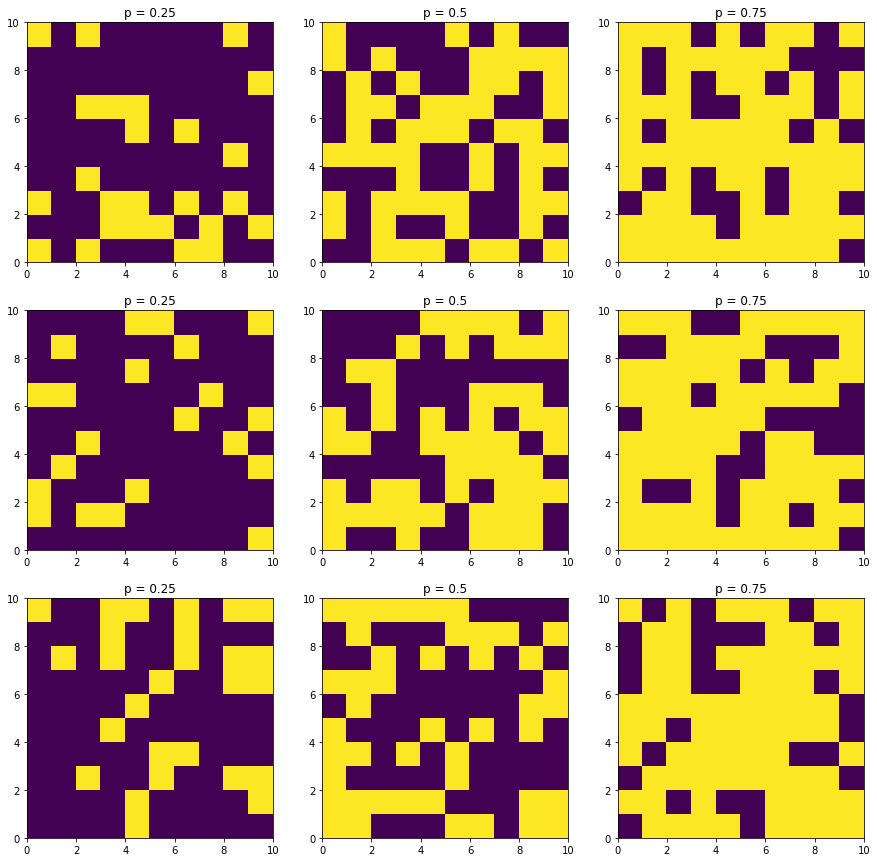

In [2]:
import matplotlib.pyplot as plt

# Create a Percolation object and a Percolation Tools object
P = Percolation(np.zeros((10,10)), RecPathFinder(SquareNeighbours()))
PT = PercolationTools(P)

trials = 3

# create subplots and some random percolations
fig, axs = plt.subplots(nrows = trials, ncols=3, figsize=(15, 15))

for i in range(0, trials):
    P.percolate(0.25)
    PT.display(axs[i,0])
    axs[i,0].set_title('p = 0.25')
    P.percolate(0.5)
    PT.display(axs[i,1])
    axs[i,1].set_title('p = 0.5')
    P.percolate(0.75)
    PT.display(axs[i,2])
    axs[i,2].set_title('p = 0.75')

Here we see $F_n(p)$ appears to be low for $p<0.5$ and large for $p>0.5$ suggesting a critical value around 0.5.

## Task 2

In task 2 we are asked to write code to actually compute this probability. We started with a recursively defined algorithm as we thought it would be significantly faster and still pretty easy to implement. You can find a loose flow diagram for the algorithm below.

![Recursive Path Finder](diagrams/recursive_algorithm.png)

The code is pretty self-explanatory from this point - simulate simply runs the algorithm a given number of times and computes the fraction where there was a path connected the left and right sides.

In [3]:
iters = 50

P_05 = Percolation(np.zeros((5, 5)), RecPathFinder(SquareNeighbours()))
P_10 = Percolation(np.zeros((10,10)), RecPathFinder(SquareNeighbours()))

print("F_5(0.25) ≈ ", P_05.simulate(iters, 0.25))
print("F_10(0.25) ≈ ", P_10.simulate(iters, 0.25))

print("F_5(0.5) ≈ ", P_05.simulate(iters, 0.5))
print("F_10(0.5) ≈ ", P_10.simulate(iters, 0.5))

print("F_5(0.75) ≈ ", P_05.simulate(iters, 0.75))
print("F_10(0.75) ≈ ", P_10.simulate(iters, 0.75))

F_5(0.25) ≈  0.0
F_10(0.25) ≈  0.0
F_5(0.5) ≈  0.28
F_10(0.5) ≈  0.12
F_5(0.75) ≈  0.86
F_10(0.75) ≈  0.98


## Task 3

In Task 3 we are asked to make our Path Finding algorithm more efficient. We were pretty happy with the speed of our recursive implementation but found it ran into difficulty for large $n$ as we were reaching the max recursive depth of Python, this is partly due to Python not having tail-recursion optimisation. Instead we decided to develop a new similarly fast algorithm based on a maze-solving algorithm (source if possible) that can handle large $n$.

See the following diagram for an explanation of Robot Algorithm

![Robot Diagram](diagrams/robot_explanation.png)

To compare we used the python's timeit function.

In [4]:
import timeit

iters = 50

P_Rob = Percolation(np.zeros((20, 20)), RobotPathFinder(SquareStateChooser()))
P_Rec = Percolation(np.zeros((20, 20)), RecPathFinder(SquareNeighbours()))

print(timeit.timeit(lambda: P_Rob.simulate(iters, 0.5), number=50))
print(timeit.timeit(lambda: P_Rec.simulate(iters, 0.5), number=50))

8.987489925999999
7.785940007000001


## Task 4

In part 3, we note that $F_n(p)$ has limit

$$F(p) = \begin{cases}
    0, & \text{if $x<p_c$}\\
    1, & \text{if $x>p_c$}
  \end{cases}$$.
  
as $n \rightarrow \infty$. And we are asked to find this limit by plotting graphs. Our graphical method for finding the critical value takes two parameters, the number of simulations to use and the number of decimal places we want to evaluate to.

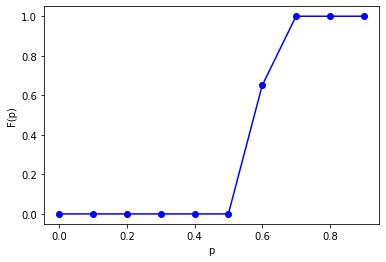

In [5]:
P = Percolation(np.zeros((100, 100)), RobotPathFinder(SquareStateChooser()))
PT = PercolationTools(P)

PT.find_critical_value_g(20, 1)

From the above we see the critical value $p_c \approx 0.6$. In order to obtain a more precise result we implemented a binary search. This works by choosing branches based on whether the simulated probability is less than or greater than $0.5$. The arguments here are the number of simulations and the number of branch points.

In [6]:
print("pc = ", PT.find_critical_value_bs(50, 20))

0 0.5 1 0.0
0.5 0.75 1 1.0
0.5 0.625 0.75 0.92
0.5 0.5625 0.625 0.06
0.5625 0.59375 0.625 0.54
0.5625 0.578125 0.59375 0.12
0.578125 0.5859375 0.59375 0.36
0.5859375 0.58984375 0.59375 0.38
0.58984375 0.591796875 0.59375 0.54
0.58984375 0.5908203125 0.591796875 0.38
0.5908203125 0.59130859375 0.591796875 0.48
0.59130859375 0.591552734375 0.591796875 0.58
0.59130859375 0.5914306640625 0.591552734375 0.38
0.5914306640625 0.59149169921875 0.591552734375 0.48
0.59149169921875 0.591522216796875 0.591552734375 0.34
0.591522216796875 0.5915374755859375 0.591552734375 0.44
0.5915374755859375 0.5915451049804688 0.591552734375 0.56
0.5915374755859375 0.5915412902832031 0.5915451049804688 0.36
0.5915412902832031 0.5915431976318359 0.5915451049804688 0.54
0.5915412902832031 0.5915422439575195 0.5915431976318359 0.6
pc =  0.5915417671203613


Others find $p_c$ to be 0.59274 (source) which makes our code accurate to 3dp for a pretty short running time.

## Task 5: Skipped

Task 5 involved modifying our code to allow for rectangular as well as square lattices (see diagram below). We decided not to complete this task due to the time constraints of the project and that there were other tasks that we would be more challenging and interesting. Also the code elegance of only using a single parameter is an added bonus.

![Rectangular Percolation](diagrams/Q5.png)


## Task 6

Task 6 involves investigating a different probability

$$G_n(p) = \mathbb{P}(\text{There is a yellow path connecting the centre of the grid to the boundary}).$$

See the diagram for a visual interpretation.

![Centre Path](diagrams/centre_path.png)

For the recursive path finder this is a fairly simple change of our previous code - we now start from the centre each time and search for neighbours until we reach the boundary. For the Robot it was a little more complicated.

High-level explanation of the changes required for the robot algorithm (Raf).

We are asked to find $G(p) = lim_{n \rightarrow \infty} G_n(p)$. We can plot a graph and see what's going on.

We do this for the recursive algorithm and then the robot algorithm.

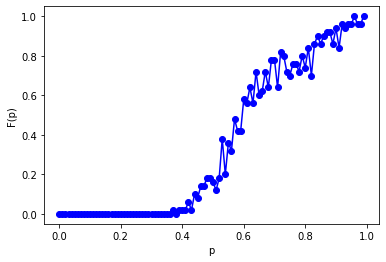

In [16]:
P = Percolation(np.zeros((21, 21)), RecPathFinder(SquareNeighbours()))
PT = PercolationTools(P)

PT.plot_centre_prob(50, 2)

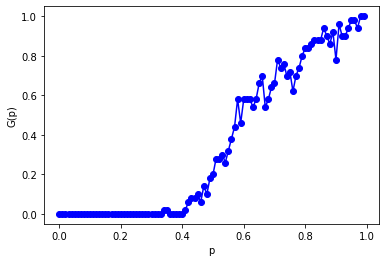

In [2]:
P = Percolation(np.zeros((21, 21)), RobotPathFinder(SquareStateChooser()))
PT = PercolationTools(P)

PT.plot_centre_prob(50, 2)

What we appear to have in both cases, is $F(p) = 0$ when $p \leq 0.4$, then $F(p)$ increases rapidly before approaching a straight line and levelling off as $p \uparrow 1$. We attempted to model this with sigmoid function using scipy's optimise class.

In [14]:
import numpy as np
from scipy import optimize

G = lambda p, c1, c2: (1 + np.exp(-c1 * (p - c2)))**(-1)

xs = np.linspace(0, 1, 100)
ys = [P.simulate_centre(50, x) for x in xs]

fit_data, covariance = optimize.curve_fit(G, xs, ys)

print(fit_data, covariance)

[10.23427764  0.6226981 ] [[ 2.13482615e-01 -1.01257491e-05]
 [-1.01257491e-05  2.46833431e-05]]


We can now plot this function.

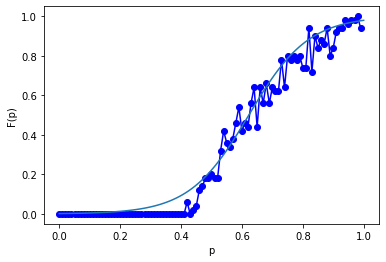

In [15]:
G_param = lambda p: G(p, 10.23427764, 0.6226981)
    
PT.plot_centre_prob(50, 2, True, G_param)

## Task 7

In task 7 we are asked to do the same again on the Triangular lattice. For the recursive PathFinder we simply need to check two additional neighbours (top right and bottom left).

The conversion from a triangular lattice to square can seen in the diagram below.

![Triangular to Square Lattice](diagrams/tri_to_squ.png)

We can also compare how a region appears when translated across.

![Triangular to Square Example](diagrams/tri_to_squ_eg.png)

We first look for the $p_c$ on the triangular lattice.

In [8]:
TP = Percolation(np.zeros((100,100)), RobotPathFinder(TriangleStateChooser()))
TPT = PercolationTools(TP)

print("pc = ", TPT.find_critical_value_bs(50, 20))

0 0.5 1 0.5
0 0.25 0.5 0.0
0.25 0.375 0.5 0.0
0.375 0.4375 0.5 0.0
0.4375 0.46875 0.5 0.08
0.46875 0.484375 0.5 0.16
0.484375 0.4921875 0.5 0.2
0.4921875 0.49609375 0.5 0.4
0.49609375 0.498046875 0.5 0.46
0.498046875 0.4990234375 0.5 0.42
0.4990234375 0.49951171875 0.5 0.44
0.49951171875 0.499755859375 0.5 0.46
0.499755859375 0.4998779296875 0.5 0.42
0.4998779296875 0.49993896484375 0.5 0.48
0.49993896484375 0.499969482421875 0.5 0.5
0.49993896484375 0.4999542236328125 0.499969482421875 0.48
0.4999542236328125 0.49996185302734375 0.499969482421875 0.46
0.49996185302734375 0.4999656677246094 0.499969482421875 0.6
0.49996185302734375 0.49996376037597656 0.4999656677246094 0.48
0.49996376037597656 0.49996471405029297 0.4999656677246094 0.58
pc =  0.49996423721313477


It can be proven that $p_c = 0.5$ for the triangular lattice so our results are pretty close.

We can also investigate $G$ for the triangular lattice. Due to time-constraints we were not able to extend the robot code for the centre path on the triangular lattice, however we can still investigate for $n<100$ using the recursive code.

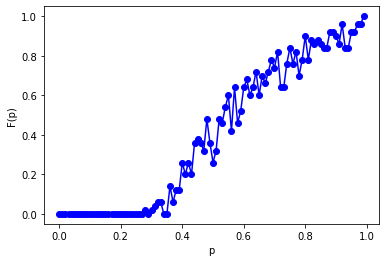

In [17]:
P = Percolation(np.zeros((21, 21)), RecPathFinder(TriangleNeighbours()))
PT = PercolationTools(P)

PT.plot_centre_prob(50,2)

Here we see similar behaviour to square the lattice except $F(p)$ increases from zero starting around $0.3$ instead of $0.4$.

## Task 8

https://stackoverflow.com/questions/18442116/fitting-an-exponential-approach-asymptotic-power-law-in-r-python/18442766

(array([1., 1., 0., 0., 0., 0., 0., 0., 1., 2.]),
 array([1.03883556, 1.04844421, 1.05805287, 1.06766153, 1.07727018,
        1.08687884, 1.09648749, 1.10609615, 1.11570481, 1.12531346,
        1.13492212]),
 <a list of 10 Patch objects>)

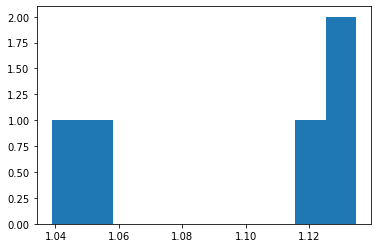

In [4]:
import numpy as np
from scipy import optimize

def beta(n):
    TP = Percolation(np.zeros((n,n)), RecPathFinder(TriangleNeighbours()))
    
    def exponential(x, beta):
        return x**beta

    xs = [0.5 + e for e in np.linspace(0, 1e-1, 20)]
    ys = [TP.simulate_centre(50, x) for x in xs]

    fit_data, covariance = optimize.curve_fit(exponential, xs, ys, 0.5)
    
    return fit_data[0]

betas = [beta(21) for _ in range(5)]

plt.hist(betas)

## Results from time-intensive tests